In [3]:
import pandas as pd
import choroplethNYC

import geopandas as gpd
from matplotlib import pyplot as plt

In [4]:
# read in data as a csv
pluto = pd.read_csv('PLUTO subset CUNY data challenge - pluto_datachallenge_subset.csv')

pluto.head()

/Users/tedu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
0,BK,8720,2219,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,NaN
1,QN,7781,30,411.0,1291.02,1011.0,26.0,23.0,11427.0,E301,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000006...
2,QN,7794,436,411.0,1291.02,1000.0,26.0,23.0,11427.0,E326,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000006...
3,QN,7810,30,411.0,1291.02,3000.0,26.0,23.0,11427.0,E326,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000005...
4,QN,7816,48,411.0,1291.02,2009.0,26.0,23.0,11427.0,E301,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000005...


get a quick summary of the data set...

In [4]:
pluto.describe()

,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,...,taxmap,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate
count,10000.000000,10000.000000,9585.000000,10000.000000,9585.000000,9585.000000,9585.000000,9574.000000,9585.000000,9585.000000,...,9585.000000,1.028000e+03,0.0,10000.000000,9585.000000,9585.000000,332.0,697.0,0.0,0.0
mean,5576.161600,90.770200,360.056547,453.313304,2041.042567,22.496714,32.206260,11020.825569,88.413459,3241.351904,...,37376.767866,3.936447e+09,NaN,1.004100,8.320188,38.817006,1.0,1.0,NaN,NaN
std,3805.521961,462.189783,99.525468,387.212545,1164.329096,7.810772,13.119655,472.923585,28.962933,2635.284025,...,10701.187000,1.171752e+09,NaN,0.072689,4.960469,9.456169,0.0,0.0,NaN,NaN
min,1.000000,1.000000,101.000000,0.000000,1000.000000,1.000000,1.000000,10001.000000,1.000000,100.000000,...,3.000000,1.000150e+09,NaN,1.000000,1.000000,11.000000,1.0,1.0,NaN,NaN
25%,2493.500000,20.000000,308.000000,153.000000,1004.000000,18.000000,23.000000,10466.000000,66.000000,920.000000,...,31301.000000,3.038643e+09,NaN,1.000000,3.000000,33.000000,1.0,1.0,NaN,NaN
50%,5006.000000,39.000000,404.000000,329.500000,2001.000000,25.000000,31.000000,11226.000000,103.000000,2800.000000,...,41104.000000,4.106860e+09,NaN,1.000000,9.000000,42.000000,1.0,1.0,NaN,NaN
75%,7951.750000,65.000000,412.000000,664.000000,3000.000000,29.000000,45.000000,11375.000000,111.000000,4400.000000,...,45001.000000,5.029220e+09,NaN,1.000000,12.000000,45.000000,1.0,1.0,NaN,NaN
max,16319.000000,9037.000000,503.000000,1621.000000,8013.000000,32.000000,51.000000,11694.000000,123.000000,9120.000000,...,53203.000000,5.080450e+09,NaN,4.000000,18.000000,51.000000,1.0,1.0,NaN,NaN


this gives us a rough sense of the size of the dataset. 10,000 rows and 64 columns. 

In [7]:
# what are the fields?

pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'zonemap', 'zmcode', 'sanb

## Q1. Using the above PLUTO data and the software of your choice, create a map illustrating the number residential units for lots where the assessed total value is 1,000,000 USD or more. If you create a static map, please deliver your map as a pdf; however, if you create a web map please provide the link to your map in the answers.pdf file.

### From the pluto dictionary: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v21beta

#### The ASSESSED TOTAL VALUE (AssessTot) is the field we are looking for (The assessed total value for the tax lot.)

#### RESIDENTIAL UNITS (UnitsRes) tells us the sum of residential units in all buildings on the tax lot.

In [9]:
num_res_unit = pluto.loc[pluto.assesstot >= 1000000.].unitsres

num_res_unit.describe()

count    396.000000
mean      32.098485
std       84.980283
min        0.000000
25%        0.000000
50%        7.000000
75%       31.250000
max      936.000000
Name: unitsres, dtype: float64



we have about four hundred tax lots valued at one millions dollars or more in the dataset and get the sense of the distribution of number of residential units on these lots.

For the mapping I am going to need the geometries for the lots. Which I will use the MapPLUTO from here: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page



In [6]:
one_mil = pluto.loc[pluto.assesstot >= 1000000.]

one_mil.describe()

,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,...,taxmap,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate
count,396.000000,396.000000,385.000000,396.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,6.800000e+01,0.0,396.0,385.000000,385.000000,20.0,25.0,0.0,0.0
mean,2440.108586,419.280303,199.010390,219.616364,2530.246753,9.436364,15.664935,10441.646753,43.524675,4083.935065,...,20157.309091,2.335191e+09,NaN,1.0,6.290909,23.355844,1.0,1.0,NaN,NaN
std,2758.671147,1636.466897,124.141971,245.897514,1642.532982,9.765571,15.755602,556.290027,37.425482,2290.357665,...,13036.492768,1.310778e+09,NaN,0.0,4.136165,12.002848,0.0,0.0,NaN,NaN
min,14.000000,1.000000,101.000000,0.000000,1000.000000,1.000000,1.000000,10001.000000,1.000000,100.000000,...,10101.000000,1.000150e+09,NaN,1.0,1.000000,11.000000,1.0,1.0,NaN,NaN
25%,828.750000,12.000000,105.000000,65.750000,1004.000000,2.000000,3.000000,10018.000000,17.000000,2320.000000,...,10401.000000,1.011160e+09,NaN,1.0,3.000000,15.000000,1.0,1.0,NaN,NaN
50%,1409.000000,33.000000,108.000000,140.000000,2001.000000,3.000000,7.000000,10036.000000,24.000000,4100.000000,...,10603.000000,2.033846e+09,NaN,1.0,6.000000,16.000000,1.0,1.0,NaN,NaN
75%,2469.000000,54.000000,306.000000,231.250000,4000.000000,15.000000,31.000000,11204.000000,72.000000,5700.000000,...,30804.000000,3.028390e+09,NaN,1.0,8.000000,35.000000,1.0,1.0,NaN,NaN
max,15744.000000,7519.000000,503.000000,1339.000000,8001.000000,31.000000,51.000000,11691.000000,123.000000,9120.000000,...,53001.000000,5.073281e+09,NaN,1.0,18.000000,51.000000,1.0,1.0,NaN,NaN


In [2]:
mappluto = gpd.read_file("nyc_mappluto_20v1_shp/MapPLUTO.shp")

mappluto.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,BK,834,46,307,106,2001,20,38,11220,L114,...,None,None,20v1,None,40.637972,-74.007347,None,207.711449,1787.436955,"POLYGON ((982250.8054956794 171690.992625922, ..."
1,QN,4042,106,407,929,3000,25,19,11356,E297,...,None,None,20v1,None,40.786562,-73.846003,None,295.246562,4881.147316,"POLYGON ((1026945.439203337 225904.073175922, ..."
2,BK,4679,17,317,866,3002,18,41,11203,L174,...,None,None,20v1,None,40.653216,-73.926923,None,263.182249,2999.990482,"POLYGON ((1004579.229670763 177258.3151526749,..."
3,BK,7831,6,318,676,1002,22,46,11234,L159,...,None,None,20v1,None,40.623876,-73.925958,None,221.331726,1820.406759,"POLYGON ((1004818.139626011 166536.4947328418,..."
4,BK,7831,7,318,676,1002,22,46,11234,L159,...,None,None,20v1,None,40.623874,-73.926030,None,221.222061,1812.224332,"POLYGON ((1004798.108826175 166534.8215078413,..."


We have to look take a look at if the geometries are for . We found this in the metadata (https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/meta_mappluto.pdf?r=20v1) for the MapPLUTO : This error was not in MapPLUTO, which uses the __geometry of the billing BBL__. Because these lots did not have a billing BBL assigned, they were not mapped. So we are going to join the two dataframe on the BBL. But first lets 

In [3]:
mappluto.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent',
       'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

In [8]:
geometry.head()

,BBL,geometry
0,3.008340e+09,"POLYGON ((982250.8054956794 171690.992625922, ..."
1,4.040420e+09,"POLYGON ((1026945.439203337 225904.073175922, ..."
2,3.046790e+09,"POLYGON ((1004579.229670763 177258.3151526749,..."
3,3.078310e+09,"POLYGON ((1004818.139626011 166536.4947328418,..."
4,3.078310e+09,"POLYGON ((1004798.108826175 166534.8215078413,..."


In [12]:
# keep only the relevant columns 

geometry = mappluto[['BBL', 'geometry']]

# join the geometry to our dataset

one_mil_gdf = gpd.GeoDataFrame(one_mil)

one_mil_geo = one_mil_gdf.merge(geometry, left_on='bbl', right_on='BBL', how='left')

one_mil_geo.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,BBL,geometry
0,SI,6431,150,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E6100000010000000103000000010000000B...,5.064310e+09,"POLYGON ((936991.6007386744 131123.9507286698,..."
1,BK,7629,63,314.0,748.0,1001.0,22.0,45.0,11210.0,L159,...,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000015...,3.076290e+09,"POLYGON ((999195.112814337 166004.584707424, 9..."
2,MN,1316,12,106.0,88.0,1001.0,2.0,4.0,10017.0,E021,...,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000007...,1.013160e+09,"POLYGON ((991832.6134317517 212811.8569063395,..."
3,SI,683,301,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000012...,5.006830e+09,"POLYGON ((955034.4107815921 161149.1616755128,..."
4,MN,706,1,104.0,99.0,1040.0,2.0,3.0,10001.0,E034,...,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000007...,1.007060e+09,"POLYGON ((984080.3375977576 214703.7950515896,..."


Text(0.5, 1.0, 'Numer of Residential Units with Assessed Total Values At Least One Million USD')

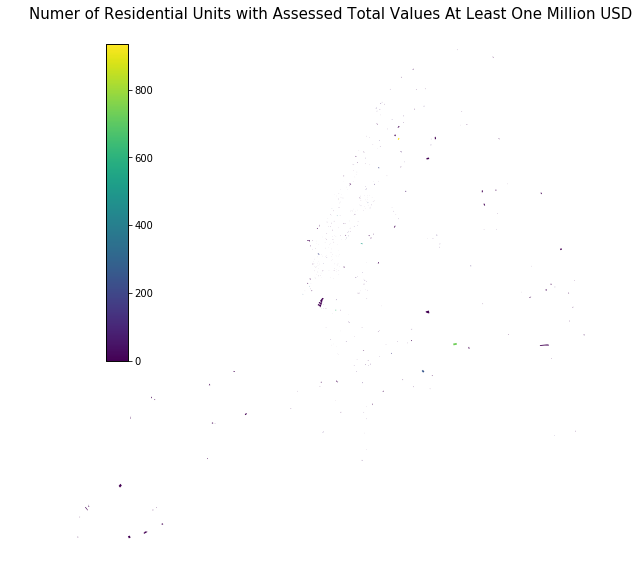

In [32]:
# create the choropleth
fig, ax, cb = choroplethNYC.choroplethNYC(one_mil_geo, column='unitsres')

# add some title to the figure
ax.set_title('Numer of Residential Units with Assessed Total Values At Least One Million USD', fontsize=15)

#### Figure 1. You can see that this is not a very good visualization of our data. I think it can be improved in two areas. First, there are wide range of values so we have a lot of bbl with number of residential units values at the lower end of the range. Let try to remove some outliers and see if we can make the map a little more readble. 

Text(0.5, 1.0, 'Numer of Residential Units with Assessed Total Values At Least One Million USD')

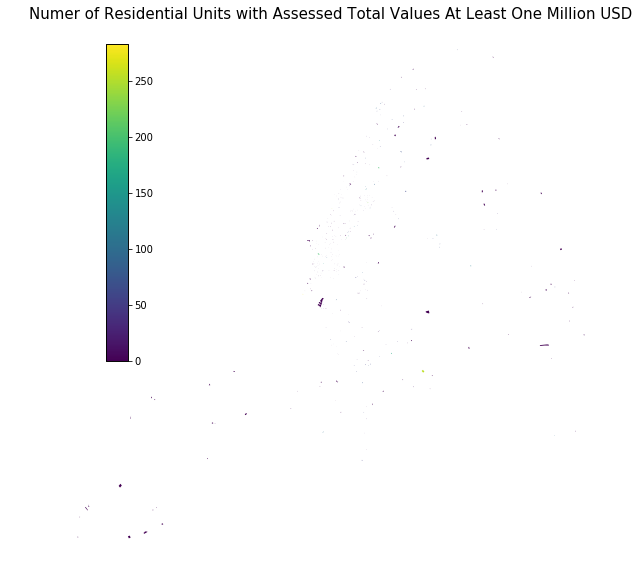

In [33]:
# remove the outliers three standard deviations away from the mean units of residential units

outliers_removed = one_mil_geo.loc[(one_mil_geo.unitsres < ( 32.098485 + 3 * 84.9802)) & 
                                  (one_mil_geo.unitsres > ( 32.098485 - 3 * 84.9802))]

fig, ax, cb = choroplethNYC.choroplethNYC(outliers_removed, column='unitsres')

ax.set_title('Numer of Residential Units with Assessed Total Values At Least One Million USD', fontsize=15)

#### Figure 2. it is still not working very well. But we can see the range has been narrowed and we can get a little better view of it. But the data is still too sparse. Another strategy might be plotting borough by borough. 

Text(0.5, 1.0, 'Numer of Residential Units with Assessed Total Values At Least One Million USD in Manhattan')

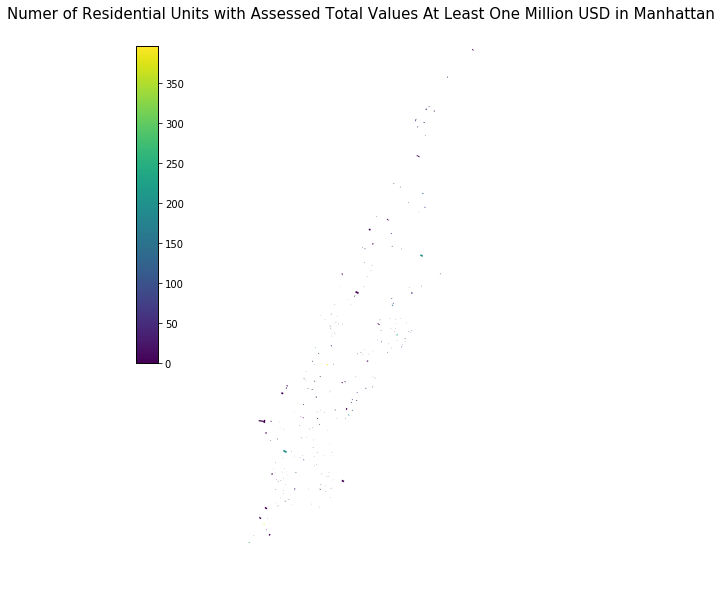

In [31]:
# get the subset of Manhattan bbls
one_mil_geo_man = one_mil_geo.loc[one_mil_geo.borocode == 1]

fig, ax, cb = choroplethNYC.choroplethNYC(one_mil_geo_man, column='unitsres')

ax.set_title('Numer of Residential Units with Assessed Total Values At Least One Million USD in Manhattan', fontsize=15)

#### Still, the lots that satisfied the requirements are definitely sparse therefore hardly legible but it is definitely improved from the previous map. We can further zoom in to smaller area. But I think the only really effective way to remedy this is to build an interactive map (with Bokeh for example) which allows users to click on individual BBL and get more information about the spcific lot. Unfortunately it is going to take more time to finish.

## Q2. What is the unique identifier in this dataset?

In [37]:
pluto.nunique().sort_values(ascending=False).head(3)

bbl        10000
geom        9965
address     9871
dtype: int64

#### bbl is the unique identifier with 10,000 unique values for 10,000 records. It makes sense too that since the geometries just used to create the map are also tied to bbl which necessarily be unique.  

## Q3. Which record is the largest tax lot? How many buildings are on this tax lot?

#### LotArea has the description: Total area of the tax lot, expressed in square feet rounded to the nearest integer. 

In [42]:
print('the biggest log has area:' ,pluto.lotarea.max())

pluto.loc[pluto.lotarea == pluto.lotarea.max()]

the biggest log has area: 700000.0


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
5888,QN,12319,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,07/06/2019,10/25/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000008...


There are a few candidates here for number of buildings  the lot

NumBldgs: The number of buildings on the tax lot.

UnitsTotal: The sum of residential and non-residential (offices, retail stores, etc.) units for all
buildings on the tax lot. with the caveat The count of non-residential units is sometimes not available if the building contains residential units.


In [39]:
print('Number of buildings based on numbldgs field: ', pluto.iloc[5888, :].numbldgs)

print('Number of buildings based on unitstotal field: ', pluto.iloc[5888, :].unitstotal)

Number of buildings based on numbldgs field:  0.0
Number of buildings based on unitstotal field:  0


Both of those say zero. but we can check the BldgArea which has the description: The total gross area in square feet, except for condominium measurements which come from the Condo Declaration and are net square footage not gross.

In [41]:
print('Toal buildings gross area based on bldgarea field: ', pluto.iloc[5888, :].bldgarea)

Toal buildings gross area based on bldgarea field:  0


#### This seems conclusive. This lot has no units on it. 

## Q4 How mang unique building classes are in the dataset?

BldgClass: A code describing the major use of structures on the tax lot

In [8]:
print('Number of unique building class in the dataset:', pluto.bldgclass.nunique())

Number of unique building class in the dataset: 143


## Q5 What is the most frequent land use type?

### LandUse field has a description: A code for the tax lot's land use category.



In [44]:
print('the most frequent land use code is: ', pluto.groupby('landuse').borough.count())

the most frequent land use code is:  landuse
1.0     7036
2.0     1323
3.0      104
4.0      406
5.0      174
6.0       78
7.0       80
8.0       90
9.0       42
10.0      84
11.0     554
Name: borough, dtype: int64


#### This suggests the One & Two Family Buildings are most frequent land use categories in our dataset. Is this consistent with the overall pattern in the complete PLUTO dataset?

In [47]:
print('the overall most frequent land use code is: ', mappluto.groupby('LandUse').Borough.count())

the overall most frequent land use code is:  LandUse
01    565463
02    131153
03     12445
04     54913
05     21477
06      9860
07      6067
08     12138
09      4007
10      9890
11     26894
Name: Borough, dtype: int64
